---

# IT00CJ42: Search and Optimization Algorithms

**Restart the kernel and run all cells** before you turn this problem in, make sure everything runs as expected.

Make sure you fill in any place that says `YOUR CODE HERE`.

---

## Week 2

### Imports

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy

np.random.seed(1)

### Solutions check
We use the function **check** to implement tests for your solution

In [2]:
def check(expression, message=""):
    if not expression:
        raise AssertionError(message)
    return "Passed"

### Preliminaries
We will use function_1 and function_2 as objective functions to optimize.

In [3]:
def function_1(x):
    return 0.1 * x ** 2 + 10 * math.sin(3 * x)
def function_2(x):
    return 0.1 * x ** 2 + 4 * math.cos(math.pi / 2 + 2 * x)

You can pass a function as a parameter in Python.<br>
<br>
As an example, plot_function creates a 2D plot of the function passed as first parameters

In [4]:
def plot_function(function, x_range_min, x_range_max, title="", markers_x=None):
    X = np.arange(x_range_min, x_range_max, 0.01)
    Y = np.array([function(x) for x in X])
    plt.plot(X, Y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title(title)
    if markers_x:
        for marker_x in markers_x:
            plt.scatter([marker_x], [function(marker_x)], color="red")
    plt.show()

Example: Create a plot of function_1<br>
You can see that this function has many local maxima and minima.

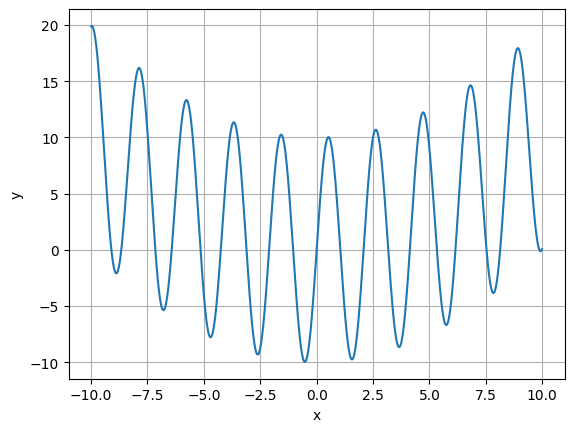

In [5]:
plot_function(function_1, -10, 10)

xample: Create a plot of function_2<br>
You can also see that this function has many local maxima and minima.

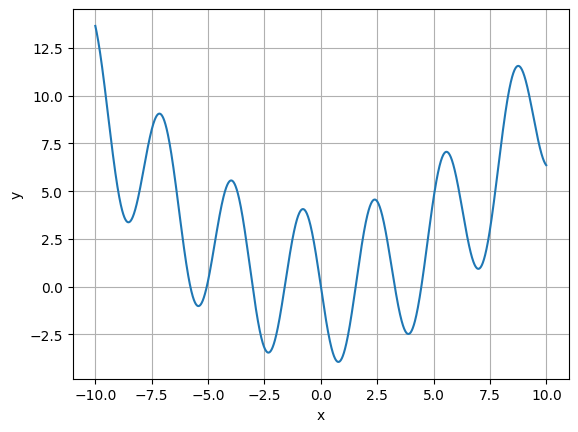

In [6]:
plot_function(function_2, -10, 10)

The class ObjectiveFuctionMonitor is used to keep track of how many times<br>
a given function is called.

In [7]:
class ObjectiveFuctionMonitor:
    def __init__(self, objective_function):
        self.objective_function = objective_function
        self.reset()
    def reset(self):
        self.n_of_calls = 0
        self.calls = []
    def __call__(self, *args, **kwargs):
        self.n_of_calls = self.n_of_calls + 1
        result = self.objective_function(*args, **kwargs)
        self.calls.append((args, kwargs, result))
        return result

### Task 1
Implement a minimization function by random search

trials = 0
best = select a new random solution for S 
while trials < budget:
s= select a new random solution 
If fitness(s) > fitness(best):
best = s
trials = trials+1


In [8]:
def random_search(function, r_min_x, r_max_x, budget):
    """random_search minimization"""
    min_x = None
    min_y = None
    for i in range(budget):
        cur_x = np.random.uniform(r_min_x,r_max_x)
        cur_y = function(cur_x)
        if min_y == None or cur_y < min_y:
#             update the min_x and min_y
            min_x = cur_x
            min_y = cur_y
    return min_x, min_y

#### Check the solution
Let's check your random search function

In [9]:
of = ObjectiveFuctionMonitor(function_1)
min_x, min_y = random_search(of, -10, 10, 100)

In [10]:
check(-10 <= min_x <= 10, "x should be in range")
check(min_y == function_1(min_x) , "y should be the image of x")
check(of.n_of_calls <= 100, "do not exceed the budget")

'Passed'

Run random_search 10 times, plot the results

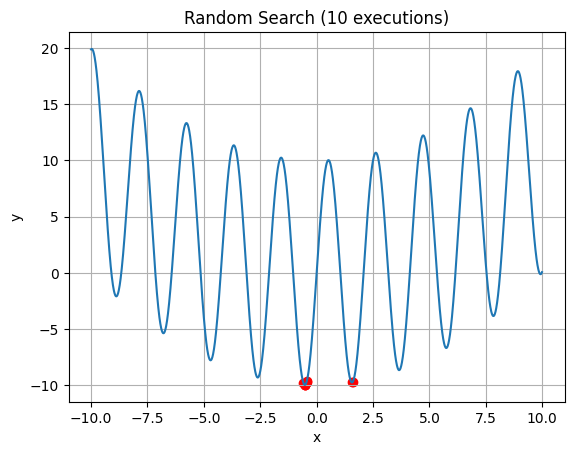

In [11]:
X = [random_search(function_1, -10, 10, 100)[0] for i in range(10)]
plot_function(function_1, -10, 10, "Random Search (10 executions)", markers_x=X)

### Task 2
Implement a minimization function by hill climbing

In [12]:
def hill_climbing(function, r_min_x, r_max_x, budget):
    """hill_climbing minimization"""
    min_x = None
    min_y = None
    delta = (r_max_x - r_min_x) / budget
    
    min_x = np.random.uniform(r_min_x, r_max_x)
    min_y = function(min_x)
    for i in range((int)(budget/3)):
        y_right = function(min_x+delta)
        y_left = function(min_x-delta)
        
#         there are 2 cases: 1. left >= right, 2. left < right
#         check the left and right neighbor of y
        if min_x + delta < r_max_x and min_x - delta > r_min_x and y_right < min_y and y_left >= y_right:
        # if min_x + delta < r_max_x and y_right < min_y and min_x - delta > r_min_x and y_left >= y_right:

#         decreasing zone, left >= righ
            min_x = min_x + delta
            min_y = y_right
        elif min_x - delta > r_min_x and y_left < min_y: 
#         increasing zone left <= right
#         search leftward, if current min_x - delta still more than r_min_x
#         set new min_x as min_x - delta
#         set new min_y
            min_x = min_x - delta
            min_y = y_left
        else:
#           after some iterations, new min_x exceeds the boundary
#           random helps to jump out the region min
            alternative_x = np.random.uniform(r_min_x, r_max_x)
            alternative_y = function(alternative_x)
            if alternative_y < min_y:
                min_x = alternative_x
                min_y = alternative_y
    
    return min_x, min_y

#### Check the solution
Hill climbing works and returns a solution in the given interval

In [13]:
of = ObjectiveFuctionMonitor(function_1)
min_x, min_y = hill_climbing(of, -10, 10, 100)

In [14]:
check(-10 <= min_x <= 10,  "x should be in range")
check(min_y == function_1(min_x) , "y should be the image of x")
check(of.n_of_calls <= 100, "do not exceed the budget")

'Passed'

Check Task: Run hill climbing 10 times, plot the results

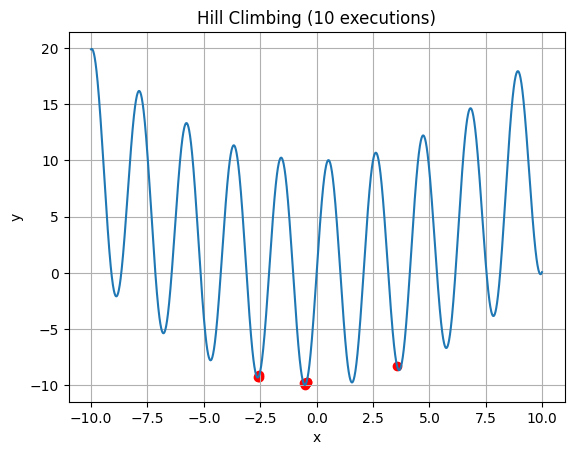

In [15]:
X = [hill_climbing(function_1, -10, 10, 100)[0] for i in range(10)]
plot_function(function_1, -10, 10, "Hill Climbing (10 executions)", markers_x=X)

### Task 3
We are developing a software application and we have created a test suite containing many unit tests. There are two<br>
important features of a unit test:<br>
1) its code coverage (how much code of the software application is executed when running the test), and<br>
2) its execution time (how much time is needed to run the test).<br>
<br>
For a given test t,<br>
the function t.time returns the execution time for the unit test in seconds<br>
the function t.coverage returns a set of source code lines that are executing when running the test<br>
For example, our application  has 3 tests t1, t2 and t3 with the following attributes:<br>
<br>
t1.time= 2 , t1.coverage={1,2,5,6,7}<br>
<br>
t2.time= 4 , t2.coverage={1,3,10,11,12}<br>
<br>
t3.time = 3, t3.coverage= {1,3,5 }<br>
<br>
If we execute tests t1 and t3 then the total execution time will be 2+3 = 5 and the total code coverage<br>
will be {1,2,5,6,7} U {1,3,5 } = {1,2,3,5,6,7}, with 6 lines of code covered by the tests.<br>
<br>
If we execute tests t1, t2 and t3 then the total execution time will be 2+4+3=  9  and the total code coverage<br>
will be {1,2,5,6,7} U {1,3,10,11,12} U {1,3,5 } = {1,2,3,5,6,7,10,11,12},  with 9 lines of code covered by the tests.<br>
<br>
A test selection algorithm in an optimization algorithm that given a set of tests T, selects a subset of T such that:<br>
<br>
1) the total execution time is smaller than a given value, representing our maximum testing time<br>
2) maximizes the total code coverage<br>
<br>
Your task is to implement an *objective function* in Python for this test selection algorithm. This functions returns<br>
- the code coverage for the test suite, if it can be executed within the maximum allowed time<br>
- 0, otherwise

This class represents a single test

In [16]:
class Test:
    def __init__(self, time, coverage):
        self.time = time
        self.coverage = coverage

Your task is to implement an *objective function* in Python for this problem. Given a set of tests and the maximum allowed time, this functions returns: <br>
- the code coverage for the test suite, if it can be executed within the maximum allowed time<br>
- 0, otherwise


In [17]:
def test_suite_coverage(T: set[Test], maximum_time: int) -> int:
    # YOUR CODE HERE
    total_coverage = set()
    total_time = 0
    # skip the whole coverage update part if the time needed in total exedes the maximun_time
    for test in T:
        total_time += test.time
    if total_time <= maximum_time:
        for test in T:
            total_coverage.update(test.coverage)
    score = len(total_coverage)    
    return score

#### Check the solution
Create a test suite for the example

In [18]:
t1= Test(time=2, coverage = {1, 2, 5, 6, 7} )
t2= Test(time=4, coverage = {1, 3, 10, 11, 12} )
t3= Test(time=3, coverage = {1, 3, 5} )

In [19]:
check(test_suite_coverage( {t1,t3}, 100) == 6, "6 lines of code covered by t1 and t3")
check(test_suite_coverage( {t1,t3}, 5) == 6, "6 lines of code covered by t1 and t3, 5 time units")
check(test_suite_coverage( {t1,t2,t3}, 100) == 9, "9 lines of code covered by t1, t2 and t3")

'Passed'

In [20]:
check(test_suite_coverage({t1,t2,t3}, 2) == 0, "Test suite is too long")
check(test_suite_coverage({}, 100) == 0, "Empty test suite")

'Passed'